In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from tqdm.notebook import tqdm

In [4]:
@jit(nopython = True)
def RKHG(f,y0,t,D,args=()):
    n = len(t)
    size = len(y0)
    y = np.zeros((n, size))
    y[0] = y0
    h = t[1] - t[0]
    sh = np.sqrt(h)
    for i in range(n - 1):
        S = np.random.choice(np.array([-1,1]),size=size)
        dW = np.random.normal(0,sh,size)
        k1 = h*f(y[i],t[i],*args) + (dW - S*sh)*D
        k2 = h*f(y[i]+k1,t[i]+h,*args) + (dW + S*sh)*D
        y[i+1] = y[i] + 0.5*(k1+k2)
    return y

In [5]:
@jit(nopython=True)
def get_order_parameter(theta,N):
    ''' get theta and return r and theta'''
    rpsi = 1/N*np.sum(np.exp(1j*theta))
    r = np.abs(rpsi)
    psi = np.angle(rpsi)
    return r,psi

@jit(nopython=True)
def Kuramoto_mf_AR(Theta,t,omega,N,K,b):
    # print("Case m = 0")
    Theta = Theta.copy()
    theta = Theta[:N]
    r,psi = get_order_parameter(theta,N)
    dtheta = omega + K*r*np.sin(psi - theta) - b*np.sin(theta)
    Theta[:N] = dtheta
    return Theta

In [7]:
N = 100
theta_random = np.random.uniform(0,2*np.pi,N)
omega = 1

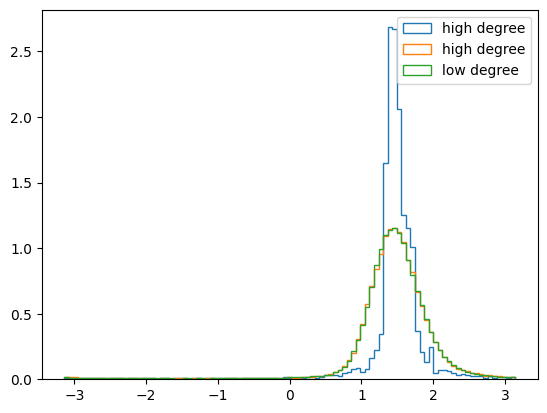

In [8]:
K = 1
t_end = 500
dt = 0.1
t = np.arange(0, t_end+dt/2, dt)
# D = MAX_D
# D = 0.6

D=0.4
b=1.05

# Ds =np.linspace(0.4,0.7,20)
# chis = []
# d_rsigma = []
sol = RKHG(Kuramoto_mf_AR,theta_random,t,D, args=(omega, N, K,b))
# sol = RKHG(Kuramoto_AR,theta_random,t,D, args=(omega, N, K,b))
th = 0
theta_s = sol[th:,:N]
rabs = np.mean(np.exp(theta_s.T*1j),axis=0)
# rabs = rabs_[len(t)//2:]
r = np.abs(rabs)
r_mean = np.mean(r[-len(r)//2:])
sigma_phi = np.mean(rabs[-len(r)//2:])
sigma = np.abs(sigma_phi)
psi = np.angle(sigma_phi)
chi = np.mean(np.abs(rabs-sigma_phi)**2)*N



A = (sol+np.pi)%(2*np.pi) - np.pi
bins = np.linspace(-np.pi,np.pi,100)

# plt.axes(polar=True)
plt.hist(np.angle(rabs[len(r)//2:]),bins=bins, histtype='step', stacked=True, fill=False,label='high degree',density=True)

plt.hist(A[len(A)//2:,:50].flatten(),bins=bins, histtype='step', stacked=True, fill=False,label='high degree',density=True)
plt.hist(A[len(A)//2:,-50:].flatten(),bins=bins, histtype='step', stacked=True, fill=False,label='low degree',density=True)
plt.legend()

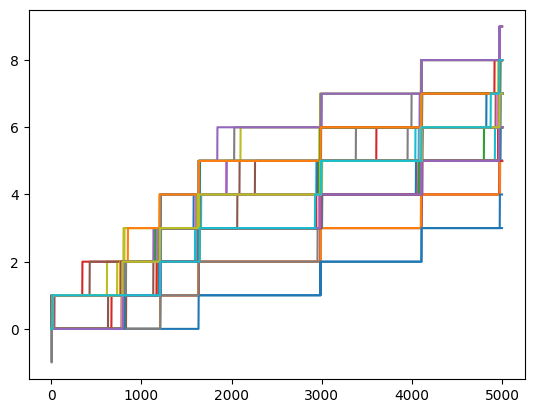

In [12]:
plt.plot(np.floor_divide(sol,2*np.pi))